In [21]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
water = pd.read_csv('new_water_done5.csv')
green = pd.read_csv('iso_green.csv')
inno = pd.read_csv('iso_inno.csv')
infra = pd.read_csv('iso_infra.csv')
MEI = pd.read_csv('iso_mei.csv')
import pandas as pd


columns_water = water.select_dtypes(include=['float', 'int'])
columns_water = pd.concat([columns_water, water['ISO3']], axis=1)

columns_inno = inno.select_dtypes(include=['float', 'int'])
columns_inno = pd.concat([columns_inno, inno['ISO3']], axis=1)
columns_green = green.select_dtypes(include=['float', 'int'])
columns_green = pd.concat([columns_green, green['ISO3']], axis=1)
columns_infra = infra.select_dtypes(include=['float', 'int'])
columns_infra = pd.concat([columns_infra, infra['ISO3']], axis=1)
columns_MEI = MEI.select_dtypes(include=['float', 'int'])
columns_MEI = pd.concat([columns_MEI, MEI['ISO3']], axis=1)

# columns_water = water.select_dtypes(include=['float'])
# columns_inno = inno.select_dtypes(include=['float'])
# columns_green = green.select_dtypes(include=['float'])
# columns_infra = infra.select_dtypes(include=['float'])
# columns_MEI = MEI.select_dtypes(include=['float'])

In [6]:
import pandas as pd
import plotly.express as px

# Read the data from CSV
df = pd.read_csv('new_water_done5.csv')

# Calculate the average values per year
averages = df.groupby('Year')[['NATIONAL-Basic', 'URBAN-Basic', 'RURAL-Basic']].mean().reset_index()

# Melt the dataframe to long format
averages = pd.melt(averages, id_vars='Year', value_vars=['NATIONAL-Basic', 'URBAN-Basic', 'RURAL-Basic'],
                   var_name='Column', value_name='Average Value')

# Create a line plot for the averages
fig = px.line(averages, x='Year', y='Average Value', color='Column', markers=True, 
              labels={'Column': 'Legend Label'})

# Configure the layout
fig.update_layout(
    title='Average Water Quality per Year',
    xaxis_title='Year',
    yaxis_title='Average Water Quality %',
    showlegend=True  # Display the legend
)

# Print the average values at the beginning and end of each line
for column in averages['Column'].unique():
    avg_start = averages.loc[averages['Column'] == column, 'Average Value'].iloc[0]
    avg_end = averages.loc[averages['Column'] == column, 'Average Value'].iloc[-1]
    difference = avg_end - avg_start
    print(f'{column} Start: {avg_start:.2f}')
    print(f'{column} End: {avg_end:.2f}')
    print(f'Improvement in %: {difference:.2f}')
    print()

# Show the plot
fig.show()


NATIONAL-Basic Start: 83.28
NATIONAL-Basic End: 89.53
Improvement in %: 6.25

URBAN-Basic Start: 91.40
URBAN-Basic End: 94.03
Improvement in %: 2.63

RURAL-Basic Start: 72.19
RURAL-Basic End: 79.68
Improvement in %: 7.49



In [7]:
avg_GDP = green.groupby('ISO3')['Real GDP per capita'].mean().reset_index()

avg_national_basic = water.groupby('ISO3')['NATIONAL-Basic'].mean().reset_index()
#veranderen naar ISO3 evt
eenvalue = green.groupby('ISO3')['Loss of natural and semi-natural vegetated land, % since 1992'].median()
green_veg_loss = pd.DataFrame({'ISO3': eenvalue.index, 'Loss': eenvalue.values})
gdp = green.groupby('ISO3')['Real GDP per capita'].mean()
gdp_green = pd.DataFrame({'ISO3': gdp.index, 'GDP': gdp.values})
water_basic = water.groupby('ISO3')['NATIONAL-Basic'].mean()
water_basic_filt = pd.DataFrame({'ISO3': water_basic.index, 'Basic': water_basic.values})

In [8]:
import pandas as pd

# Define a custom function to get the last non-missing value
def last_non_missing_value(series):
    non_missing_values = series.dropna()
    return non_missing_values.iloc[-1] if len(non_missing_values) > 0 else None

# Group the data by "COU" and apply the custom function to get the last non-missing value
last_values = green.groupby('ISO3')['Renewable energy supply, % total energy supply'].apply(last_non_missing_value)

# Create a new DataFrame with "COU" and last non-missing values
last_df = pd.DataFrame({'ISO3': last_values.index, 'Last Value': last_values.values})

# Display the new DataFrame
print(last_df)



    ISO3  Last Value
0    ABW         NaN
1    AFG         NaN
2    AGO       58.07
3    AIA         NaN
4    ALB       33.88
..   ...         ...
231  WSM         NaN
232  YEM        6.05
233  ZAF        6.21
234  ZMB       81.80
235  ZWE       77.33

[236 rows x 2 columns]


In [9]:
merged_data = pd.merge(last_df, water_basic_filt, on='ISO3', how='inner')
merged_data = pd.merge(merged_data, gdp_green, on='ISO3', how='inner')
merged_data = pd.merge(merged_data, green_veg_loss, on='ISO3', how='inner')

# Display the merged DataFrame
print(merged_data)


    ISO3  Last Value      Basic           GDP    Loss
0    ABW         NaN  96.822766  38237.170909  10.040
1    AFG         NaN  49.265605   1807.108000   2.170
2    AGO       58.07  50.094761   6173.841818   1.195
3    AIA         NaN  97.044593           NaN   0.455
4    ALB       33.88  91.149894  10087.662727   1.990
..   ...         ...        ...           ...     ...
211  WSM         NaN  90.218088   5373.420455   0.000
212  YEM        6.05  50.401790   3162.222727   2.495
213  ZAF        6.21  89.467232  11695.595455   1.430
214  ZMB       81.80  56.974370   2904.625909   2.385
215  ZWE       77.33  67.535750   2390.374545   3.885

[216 rows x 5 columns]


In [10]:

data = [
    go.Parcoords(
        #line = dict(color = merged_data['ISO3'], colorscale = 'Jet', showscale = True),
        dimensions = [
            dict(range = [merged_data['GDP'].min(), merged_data['GDP'].max()],
                 label = 'GDP',
                 values = merged_data['GDP']),
            dict(range = [merged_data['Basic'].min(), merged_data['Basic'].max()],
                 label = 'Basic water avalability',
                 values = merged_data['Basic']),
            dict(range = [merged_data['Last Value'].min(), merged_data['Last Value'].max()],
                 label = '% Renewable energy',
                 values = merged_data['Last Value']),
            dict(range = [merged_data['Loss'].min(), merged_data['Loss'].max()],
                 label = 'Loss forest area since 2000',
                 values = merged_data['Loss'])
        ]
    )
]

# Define the layout of the parallel plot
layout = go.Layout(
    title = 'Parallel Plot',
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

# Create the figure and display the parallel plot
fig = go.Figure(data=data, layout=layout)
fig.show()

In [11]:
merged_data['GDP_Bins'] = pd.cut(merged_data['GDP'], bins=5)

#print(merged_data[ 'GDP_Bins'])


In [12]:
import pandas as pd


# Exclude non-numeric columns
numeric_columns = merged_data.select_dtypes(include=[np.number]).columns

# Group by the GDP bins and calculate the average for each dimension
averages = merged_data.groupby('GDP_Bins')[numeric_columns].mean()

# Reset the index to make the GDP bins a column again
averages = averages.reset_index()

# Print the resulting averages DataFrame
#print(averages)


In [13]:
import plotly.express as px

# Prepare the data for parallel coordinates plot
plot_data = averages[['GDP', 'Basic', 'Last Value', 'Loss']].reset_index(drop=True)

# Create the parallel coordinates plot using Plotly
fig = px.parallel_coordinates(plot_data)

# Update layout
fig.update_layout(
    title='Average Value for Each Dimension within GDP Bins',
    xaxis_title='Dimensions',
    yaxis_title='Average Value'
)

# Show the plot
fig.show()




import pandas as pd

# Exclude non-numeric columns
numeric_columns = merged_data.select_dtypes(include=[np.number]).columns

# Group by the GDP bins and calculate the average for each dimension
averages = merged_data.groupby(pd.cut(merged_data['GDP'], bins=[0, 20, 40, 60, 80, 110], right=False))[numeric_columns].mean()

# Reset the index to make the GDP bins a column again
averages = averages.reset_index()

# Rename the GDP bin column
averages.rename(columns={'GDP': 'GDP_Bins'}, inplace=True)

# Print the resulting averages DataFrame
print(averages)


import pandas as pd

merged_data['GDP_Bins'] = pd.cut(merged_data['GDP'], bins=[0, 20000, 40000, 60000, 80000, 110000], right=False)
cutgdp, _= pd.cut(merged_data['GDP'], bins=[0, 20000, 40000, 60000, 80000, 110000], retbins=True)
# cutqhisto, cutqscheid = pd.qcut(tips_df['tip'], q=3, labels=['Low', 'Medium', 'High'], retbins=True)
# Exclude non-numeric columns
numeric_columns = merged_data.select_dtypes(include=[np.number]).columns

# Group by the GDP bins and calculate the average for each dimension
averages = merged_data.groupby('GDP_Bins')[numeric_columns].mean()

# Reset the index to make the GDP bins a column again
averages = averages.reset_index()

# Print the resulting averages DataFrame
# print(averages)

# print(cutgdp)

In [14]:
import plotly.express as px

# Prepare the data for parallel coordinates plot
plot_data = averages[['GDP', 'Basic', 'Last Value', 'Loss']].reset_index(drop=True)

# Create the parallel coordinates plot using Plotly
fig = px.parallel_coordinates(plot_data)

# Update layout
fig.update_layout(
    title='Average Value for Each Dimension within GDP Bins',
    xaxis_title='Dimensions',
    yaxis_title='Average Value'
)

# Show the plot
fig.show()



tips_df = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/tips.csv')


cutqhisto, cutqscheid = pd.qcut(tips_df['tip'], q=3, labels=['Low', 'Medium', 'High'], retbins=True)



fig = go.Figure(data=go.Parcats(dimensions=[
        {'label': 'Tip',
         'values': cutqhisto,
         'categoryorder': 'category descending'
        },
        {'label': 'Sex',
         'values': tips_df['sex'],
         'categoryorder': 'category ascending'},
        {'label': 'Smoker',
         'values': tips_df['smoker']},
        {'label': 'Day',
         'values': tips_df['day']},
        {'label': 'Time',
         'values': tips_df['time']},
        {'label': 'Size',
         'values': tips_df['size'],
        'categoryorder': 'category ascending'},
        ],
         line=dict(color=cutqhisto.map(colors))
                               ))

    
fig.update_layout(
       title='Variables leading to tip size'
    
)

fig.show()

tips_df = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/tips.csv')


cutqhisto, cutqscheid = pd.qcut(tips_df['tip'], q=3, labels=['Low', 'Medium', 'High'], retbins=True)





fig = go.Figure(data=go.Parcats(dimensions=[
        {'label': 'Tip',
         'values': cutgdp,
         'categoryorder': 'category descending'
        },
        {'label': 'Sex',
         'values': merged_data['Basic'],
         'categoryorder': 'category ascending'},
        {'label': 'Smoker',
         'values': merged_data['Last Value']},
        {'label': 'Day',
         'values': merged_data['Loss']},
        ]))
         #line=dict(color=cutqhisto.map(colors))
    
fig.update_layout(
       title='Variables leading to tip size'
    
)

fig.show()

import plotly.graph_objects as go

cutgdp, _ = pd.qcut(merged_data['GDP'], q=3, labels=['Low', 'Medium', 'High'], retbins=True)

# cutqhisto, cutqscheid = pd.qcut(tips_df['tip'], q=3, labels=['Low', 'Medium', 'High'], retbins=True)
# # Convert cutgdp to categorical type with string labels
# cutgdp = pd.cut(merged_data['GDP'], bins=[0, 20000, 40000, 60000, 80000, 110000], labels=['0-20', '20-40', '40-60', '60-80', '80-110'])

fig = go.Figure(data=go.Parcats(dimensions=[
        {'values': cutgdp,
         'categoryorder': 'category descending'
        },
        {
         'values': merged_data['Basic'],
         'categoryorder': 'category ascending'},
        {'label': 'Smoker',
         'values': merged_data['Last Value']},
        {'label': 'Day',
         'values': merged_data['Loss']},
    ]))

fig.update_layout(
       title='Variables leading to tip size',
       autosize=False,
       width=1000,
       height=1000
)

fig.show()


In [15]:
for i in green.columns:
    print(i)

Unnamed: 0
ISO3
Country
Year
Adjustment for pollution abatement
Artificial surfaces, % total 
Bare land, % total
Biomass, % of DMC
Built up area per capita
Built up area, % total land
CO2 emissions from air transport per capita
CO2 emissions from air transport per unit of GDP
Coal support, % total fossil fuel support
Contribution of natural capital
Conversion from cropland to artificial surfaces, % since 1992
Conversion from natural and semi-natural land to artificial surfaces, % since 1992
Conversion from natural and semi-natural land to cropland, % since 1992
Conversion of not-water to permanent water surface, % permanent water, since 1984
Conversion of permanent to seasonal water surface, % permanent water, since 1984
Conversion of permanent water to not-water surface, % permanent water, since 1984
Conversion of seasonal to permanent water surface, % permanent water, since 1984
Cropland, % total
Demand-based CO2 emissions
Demand-based CO2 emissions, index 2000=100
Demand-based CO2 i

In [16]:
print( merged_data2['Production of total industry sa, Index'].corr(merged_data2['Density of road (km per one hundred sq. km)']))

NameError: name 'merged_data2' is not defined

In [ ]:
merged_data3 = pd.merge(MEI, infra, on='ISO3', how='inner')


In [ ]:
merged_data3

print( infra['Airports per one hundred thousand sq. km'].corr(infra['Density of road (km per one hundred sq. km)']))

0.699735516149364


In [ ]:
inno['Total Education Labour Force'] = inno[['    Labour Force with Elementary Education (ISCED 0-2)',
                                         '    Labour Force with Secondary education (ISCED 3-4)',
                                         '    Labour Force with Tertiary education (ISCED 5-8)']].sum(axis=1)


In [ ]:
import plotly.express as px

# Filter the dataframe to include only the last 20 years
df_filtered = water[water['Year'] >= water['Year'].max() - 19]

# Create a map chart
fig = px.choropleth(df_filtered, 
                    locations='Country', 
                    locationmode='country names', 
                    color='NATIONAL-Basic', 
                    hover_name='Country',
                    animation_frame='Year',
                    title='Improvement of NATIONAL-Basic over the last 20 years',
                    color_continuous_scale='inferno')

fig.update_layout(geo=dict(showframe=False, 
                           showcoastlines=False,
                           projection_type='equirectangular'))

fig.show()


In [ ]:
# i = 'NATIONAL-Basic'
# df_filtered = water[water['Year'] == water['Year'].min()]

# # Create a map chart
# fig = px.choropleth(df_filtered, 
#                     locations='Country', 
#                     locationmode='country names', 
#                     color=i, 
#                     hover_name='Country',
#                     title='Improvement of NATIONAL-Basic for the last year',
#                     color_continuous_scale='inferno')

# fig.update_layout(geo=dict(showframe=False, 
#                         showcoastlines=True,
#                         projection_type='equirectangular'))

# fig.show()
i = 'NATIONAL-Basic'
df_filtered = water[water['Year'] == water['Year'].max()]

# Create a map chart
fig = px.choropleth(df_filtered, 
                    locations='Country', 
                    locationmode='country names', 
                    color=i, 
                    hover_name='Country',
                    title='Improvement of NATIONAL-Basic for the last year',
                    color_continuous_scale='inferno')

fig.update_layout(geo=dict(showframe=False, 
                        showcoastlines=True,
                        projection_type='equirectangular'))

fig.show()



In [ ]:
# import matplotlib.pyplot as plt

# iso3_code = 'CHN'
# sub_df = green[green['ISO3'] == iso3_code]

# # Plotting the values over the years
# for column in columns_green:
#     plt.plot(sub_df['Year'], sub_df[column], label=column)  
#     plt.show()
#     print(column)


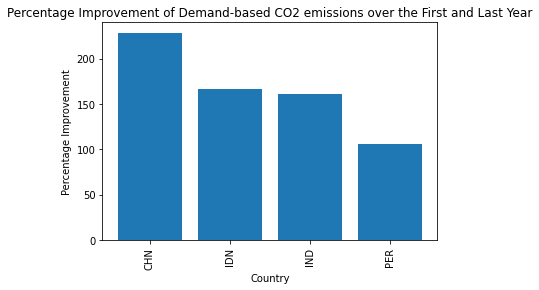

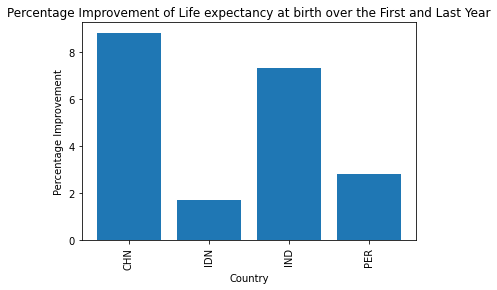

In [ ]:
import matplotlib.pyplot as plt
attributes = ['Demand-based CO2 emissions', 'Life expectancy at birth']
for attribute in attributes: 
    iso3_codes = ['CHN', 'IND',  'IDN', 'PER']

    # Filter the dataframe for the specified ISO3 codes
    filtered_df = green[green['ISO3'].isin(iso3_codes)]

    # Calculate the percentage improvement for each country
    improvement = (filtered_df.groupby('ISO3')[attribute].last().values - filtered_df.groupby('ISO3')[attribute].first().values) / filtered_df.groupby('ISO3')[attribute].first().values * 100

    # Create a bar chart
    plt.bar(filtered_df['ISO3'].unique(), improvement)
    plt.xlabel('Country')
    plt.ylabel('Percentage Improvement')
    plt.title(f'Percentage Improvement of {attribute} over the First and Last Year')
    plt.xticks(rotation=90)
    plt.show()


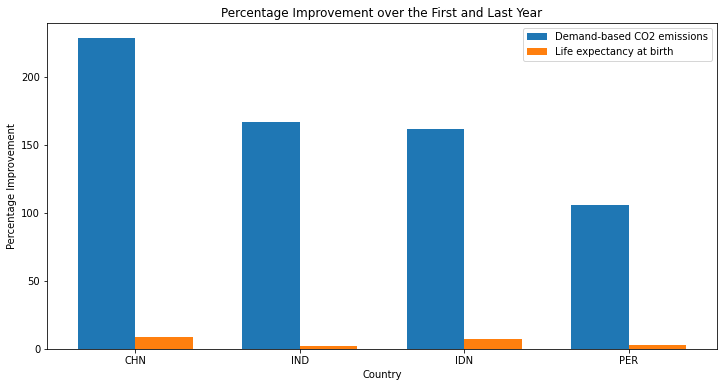

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

attributes = ['Demand-based CO2 emissions', 'Life expectancy at birth']
iso3_codes = ['CHN', 'IND', 'IDN', 'PER']

# Create subplots with two columns
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of each bar
bar_width = 0.35

# Calculate the number of bars for each attribute
num_bars = len(iso3_codes)

# Calculate the index for each attribute
indices = np.arange(num_bars)

# Iterate over the attributes
for idx, attribute in enumerate(attributes):
    # Filter the dataframe for the specified ISO3 codes and attribute
    filtered_df = green[green['ISO3'].isin(iso3_codes)]
    improvement = (filtered_df.groupby('ISO3')[attribute].last().values - filtered_df.groupby('ISO3')[attribute].first().values) / filtered_df.groupby('ISO3')[attribute].first().values * 100
    
    # Calculate the position of each bar
    bar_position = indices + idx * bar_width
    
    # Create the grouped bar chart
    ax.bar(bar_position, improvement, bar_width, label=attribute)
    
# Set the labels, title, and legend
ax.set_xlabel('Country')
ax.set_ylabel('Percentage Improvement')
ax.set_title('Percentage Improvement over the First and Last Year')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(iso3_codes)
ax.legend()

# Display the figure
plt.show()


In [ ]:


# Filter the dataframe to include only the last 20 years
df_filtered = water[water['Year'] >= water['Year'].max() - 19]

# Create a map chart
fig2 = px.choropleth(df_filtered, 
                    locations='Country', 
                    locationmode='country names', 
                    color='NATIONAL-Basic', 
                    hover_name='Country',
                    animation_frame='Year',
                    title='Improvement of NATIONAL-Basic over the last 20 years',
                    color_continuous_scale='inferno')
fig2.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play', method='animate', args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True, 'transition': {'duration': 0, 'easing': 'linear'}}]), dict(label='Pause', method='animate', args=[[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}])])])


fig2.show()


# Filter the dataframe to exclude the years 2021 and 2022
df_filtered = green[~green['Year'].isin([2021, 2022])]

# Create a map chart with faster animation
fig = px.choropleth(df_filtered, 
                    locations='Country', 
                    locationmode='country names', 
                    color='Life expectancy at birth', 
                    hover_name='Country',
                    animation_frame='Year',
                    title='Life Expectancy at Birth over the Years',
                    color_continuous_scale='inferno')

# Update animation settings for faster frame duration
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play', method='animate', args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True, 'transition': {'duration': 0, 'easing': 'linear'}}]), dict(label='Pause', method='animate', args=[[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}])])])

fig.update_layout(geo=dict(showframe=False, 
                           showcoastlines=False,
                           projection_type='equirectangular'))

fig.show()




In [ ]:
import pandas as pd

# Assuming you have two dataframes 'water' and 'green' with a 'Year' column

# Merge the dataframes on 'ISO3' and 'Year'
merged_df = pd.merge(water, green[['ISO3', 'Year', 'Life expectancy at birth']], on=['ISO3', 'Year'])

# Select the desired attributes
merged_df = merged_df[['ISO3', 'Year', 'NATIONAL-Basic', 'Life expectancy at birth']]

# Print the merged dataframe
print(merged_df)


     ISO3    Year  NATIONAL-Basic  Life expectancy at birth
0     AFG  2000.0       28.171415                     55.30
1     AFG  2001.0       28.199366                     55.80
2     AFG  2002.0       30.236385                     56.45
3     AFG  2003.0       32.273722                     57.34
4     AFG  2004.0       34.328559                     57.94
...   ...     ...             ...                       ...
4531  ZWE  2016.0       64.468964                     60.31
4532  ZWE  2017.0       63.996625                     60.71
4533  ZWE  2018.0       63.538773                     61.41
4534  ZWE  2019.0       63.094957                     61.29
4535  ZWE  2020.0       62.666458                     61.12

[4536 rows x 4 columns]


In [ ]:
import plotly.graph_objects as go

# Assuming you have the merged dataframe with attributes 'NATIONAL-Basic', 'Life expectancy at birth', and 'Year'

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    y=merged_df['Year'],
    z=merged_df['NATIONAL-Basic'],
    x=merged_df['Life expectancy at birth'],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    )
)])

# Set axis labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='Year',
        yaxis_title='NATIONAL-Basic',
        zaxis_title='Life expectancy at birth'
    ),
    title='3D Scatter Plot'
)

# Display the plot
fig.show()
